## Tutorial: Regular Expressions

In [1]:
# Import the necessary modules
import nltk
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem     import WordNetLemmatizer
from nltk.corpus   import stopwords

from collections   import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

from pathlib       import Path
import matplotlib.pyplot as plt
import re
import os

In [2]:
# set root directory
path_root = Path("C:/Users/giann/data-science-core")
os.chdir(path_root)
print(f'- Root directory = {os.getcwd()}')

- Root directory = C:\Users\giann\data-science-core


In [3]:
# import dataset
path_dataset = path_root / 'dataset/grail.txt'
file      = open(path_dataset, mode = 'r') # 'r' is to read
scene_one = file.read()
file.close()
print(scene_one[0:450])

SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SOLDIER #1: Halt!  Who goes there?
ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!
SOLDIER #1: Pull the other one!
ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court


### Regex examples

In [4]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"
print(my_string)

Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?


In [5]:
sentence_endings = r"[.?!]"
print("o Split my_string on sentence endings")
print(re.split(sentence_endings, my_string))

o Split my_string on sentence endings
["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']


In [6]:
capitalized_words = r"[A-Z]\w+"
print("o Find all capitalized words")
print(re.findall(capitalized_words, my_string))

o Find all capitalized words
['Let', 'RegEx', 'Won', 'Can', 'Or']


In [7]:
spaces = r"\s+"
print("o Split my_string on spaces")
print(re.split(spaces, my_string))

o Split my_string on spaces
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']


In [8]:
match = re.search("coconuts", scene_one)
# Print the start and end  of match
print("o Search for the first occurrence of 'coconuts' in scene_one")
print(f"strart index {match.start()} | end index {match.end()}")
print(f"pick work in scene_one = {scene_one[match.start(): match.end()]}")

o Search for the first occurrence of 'coconuts' in scene_one
strart index 580 | end index 588
pick work in scene_one = coconuts


In [9]:
pattern1 = r"\[.*\]"
print("o Search for anything which is in square brackets")
print(re.search(pattern1, scene_one))

o Search for anything which is in square brackets
<_sre.SRE_Match object; span=(9, 32), match='[wind] [clop clop clop]'>


In [12]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, scene_one[0:450]))

<_sre.SRE_Match object; span=(0, 8), match='SCENE 1:'>


###  Tokenization with NLTK
Necessary to run `nltk.download('punkt')`

In [13]:
# Split scene_one in list of strings
sentences = sent_tokenize(scene_one)
print(f'o The text was splitter in a list containing {len(sentences)} elements.')

o The text was splitter in a list containing 1881 elements.


In [14]:
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[2])
# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens  = set(word_tokenize(scene_one))
print("o list of unique tokens")
print(list(unique_tokens)[0:10])

o list of unique tokens
['jokes', 'Heee', 'Hiyah', 'ceremony', 'apologise', "'round", 'shrubbery', 'verses', 'about', 'bi-weekly']


### Plot histogram word length 

In [15]:
# Split the script into lines: lines
lines = scene_one.split('\n')
# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]
# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, '\w+') for s in lines]
# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

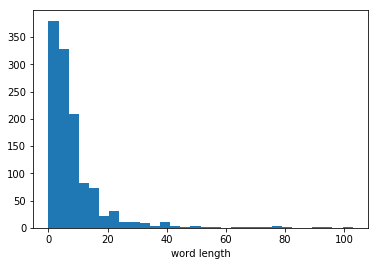

In [16]:
# Plot a histogram of the line lengths
plt.hist(line_num_words, bins = 30)
plt.xlabel('word length')
plt.show()

### Tweet tokenization with NLTK 

In [17]:
tweets = ['This is the best #nlp exercise ive found online! #python',
          '#NLP is super fun! <3 #learning',
          'Thanks @datacamp :) #nlp #python']

In [18]:
pattern1 = r"#\w+"
hashtag = regexp_tokenize(tweets[0], pattern1)
print(f"{hashtag} are the hashtag contained in \n {tweets[0]}")

['#nlp', '#python'] are the hashtag contained in 
 This is the best #nlp exercise ive found online! #python


In [19]:
pattern2 = r"[#@]\w+"
print("o Pattern that matches both mentions @ and hashtags #")
regexp_tokenize(tweets[-1], pattern2)

o Pattern that matches both mentions @ and hashtags #


['@datacamp', '#nlp', '#python']

In [20]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


### Non-ascii tokenization 

In [21]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [22]:
all_words = word_tokenize(german_text)
print(all_words)

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']


In [23]:
# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

['Wann', 'Pizza', 'Und', 'Über']


In [24]:
# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['🍕', '🚕']


## Typical pre-processing for Machine Learning

Tokenize the article: `tokens`

In [25]:
tokens = word_tokenize(scene_one)
len(tokens)

16457

Convert the tokens into lowercase: `lower_tokens`

In [26]:
lower_tokens = [t.lower() for t in tokens]

Retain alphabetic words: `alpha_only`

In [27]:
alpha_only = [t for t in lower_tokens if t.isalpha()]

Remove all stop words: `no_stops`

In [28]:
stop_words = set(stopwords.words('english')) 
no_stops = [t for t in alpha_only if t not in stop_words]

Instantiate the `wordnet_lemmatizer`

In [29]:
wordnet_lemmatizer = WordNetLemmatizer()

Lemmatize all tokens into a new list: `lemmatized`

In [32]:
#nltk.download('wordnet')
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

Create Bag of Words & Preprocessing

In [34]:
bow = Counter(lemmatized)
print(bow.most_common(10))

[('arthur', 261), ('knight', 149), ('oh', 112), ('launcelot', 101), ('galahad', 80), ('father', 75), ('sir', 71), ('bedevere', 67), ('guard', 65), ('head', 65)]
